In [80]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
from datetime import datetime

In [81]:
chrome_loc = 'C:/chrome/chromedriver.exe'
driver = webdriver.Chrome(chrome_loc)
driver.get('https://www.koreagoldx.co.kr/main/html.php?agencyCode=&htmid=goods/gold_list.html')

In [82]:
total_button = '#contents > div.sub_content > div > div.service_cont > div.clear > ul.graph_dt_buttons > li:nth-child(6) > label'
driver.find_element_by_css_selector(total_button).click()
time.sleep(3)

In [83]:
gold_html = driver.page_source
gold = BeautifulSoup(gold_html, 'html.parser')

In [84]:
# 모든페이지 크롤링
gold_price = []
for i in range(269):
    for j in range(int(len(gold.select('div.tabulator-cell'))/5)):
        date = gold.select('div.tabulator-cell')[j*5 + 0].text
        b_pure = gold.select('div.tabulator-cell')[j*5 + 1].text
        s_pure = gold.select('div.tabulator-cell')[j*5 + 2].text
        s_18k = gold.select('div.tabulator-cell')[j*5 + 3].text
        s_14k = gold.select('div.tabulator-cell')[j*5 + 4].text
        gold_price.append([date, b_pure, s_pure, s_18k, s_14k])
    nextpage = driver.find_element_by_css_selector("#example-table > div.tabulator-footer > span > button:nth-child(4)") 
    nextpage.click()
    gold_html = driver.page_source
    gold = BeautifulSoup(gold_html, 'html.parser')

In [85]:
## column 지정
gold_price = pd.DataFrame(gold_price)
gold_price.columns = ['date', 'buy_pure', 'sell_pure', 'sell_18k', 'sell_14k']   

In [87]:
## 콤마 빼기
for i in range(gold_price['date'].size):
    gold_price['buy_pure'].values[i] = gold_price['buy_pure'].values[i].replace(',','')
    gold_price['sell_pure'].values[i] = gold_price['sell_pure'].values[i].replace(',','')
    gold_price['sell_18k'].values[i] = gold_price['sell_18k'].values[i].replace(',','')
    gold_price['sell_14k'].values[i] = gold_price['sell_14k'].values[i].replace(',','')

In [88]:
## 데이터타입 int로 변경
gold_price['buy_pure'] = gold_price['buy_pure'].astype(int)
gold_price['sell_pure'] = gold_price['sell_pure'].astype(int)
gold_price['sell_18k'] = gold_price['sell_18k'].astype(int)
gold_price['sell_14k'] = gold_price['sell_14k'].astype(int)

In [89]:
# 날짜 정렬
gold_price = gold_price.sort_values(by = 'date', ascending = True)

In [91]:
# datetime 형식 변경
for i in range(len(gold_price['date'])):
    gold_price['date'].values[i] = datetime.strptime(gold_price['date'].values[i], '%Y.%m.%d')

In [93]:
# index 정렬
gold_price = gold_price.reset_index().drop('index', axis=1)

In [97]:
# date를 index로 변경
gold_price.index = gold_price['date']

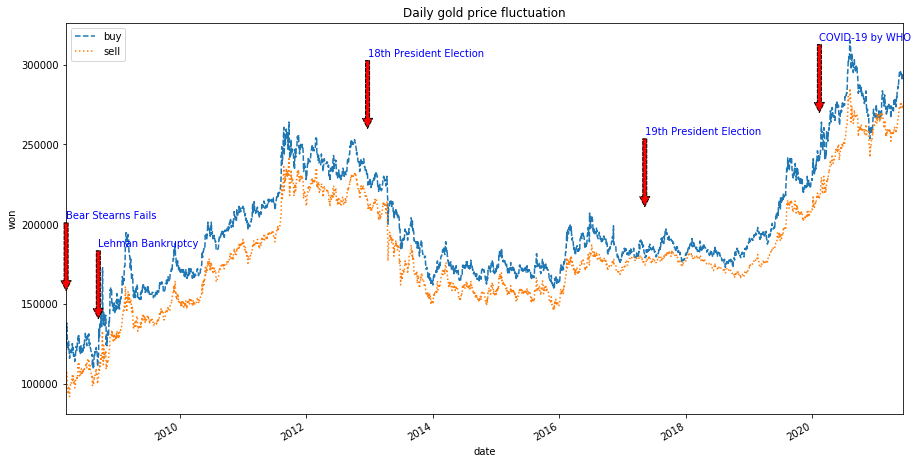

In [107]:
import matplotlib.pyplot as plt
ax = gold_price.plot('date','buy_pure',figsize = (15,8), ls = '--', label = 'buy')
gold_price.plot('date','sell_pure', ax=ax, ls = ':', label = 'sell')
plt.title('Daily gold price fluctuation')
plt.ylabel('won')
plt.legend(loc = 'upper left')
event = [
    (datetime(2008, 3, 13), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
    (datetime(2012, 12, 19), '18th President Election'),
    (datetime(2017, 5, 9), '19th President Election'),
    (datetime(2020, 2, 12), 'COVID-19 by WHO')
]
for date, label in event:
    ax.annotate(label, xy = (date, gold_price['buy_pure'].asof(date) + 30000),
               xytext=(date, gold_price['buy_pure'].asof(date) + 80000),
               arrowprops=dict(facecolor='red', headwidth=10, width=4,
                               headlength=10, ls = '--'),
                horizontalalignment='left', verticalalignment='top', c='b', fontsize = 10)